## Import Required Packages

In [424]:
from cardf_create import *
from cardetail_extract import *
from caroverview_extract import *
from carfeature_extract import *
from carspec_extract import *
import pandas as pd
import numpy as np
import plotly.express as px

## Overall Frame

In [425]:
overallframe = create_frames(read_file())

print('Cities Available',overallframe[0])

cardf = overallframe[1]
cardf.head()

Cities Available ['0,bangalore_cars', '1,chennai_cars', '2,delhi_cars', '3,hyderabad_cars', '4,jaipur_cars', '5,kolkata_cars']


,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,place
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore


In [426]:
#cardetail
detail_frame = cardetail(cardf.loc[:,['new_car_detail']])
detail_frame['place'] = cardf.place.to_list()
detail_frame.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,place
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore


In [427]:
print("1st row value----->",cardf['new_car_detail'].to_list()[0])

1st row value-----> {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}


## Detail Frame Cleaning Process

In [428]:
#detail frame cleaning process
#dropping unwanted columns and converting kilo meter column into float

detail_frame.drop(['it','ownerNo','centralVariantId','priceActual','priceSaving','priceFixedText','trendingText'],axis = 1,inplace = True)

detail_frame.km = detail_frame.km.apply(lambda x : x.replace(",","")).astype(float)

detail_frame.head(3)

,ft,bt,km,transmission,owner,oem,model,modelYear,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3rd Owner,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,bangalore
1,Petrol,SUV,32706.0,Manual,2nd Owner,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,bangalore
2,Petrol,Hatchback,11949.0,Manual,1st Owner,Tata,Tata Tiago,2018,1.2 Revotron XZ,₹ 5.85 Lakh,bangalore


In [429]:
#treating owner column

import re
detail_frame.owner = detail_frame.owner.apply(lambda owner: int(re.findall(r'\d+',owner)[0]))
detail_frame.head(1)

,ft,bt,km,transmission,owner,oem,model,modelYear,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,bangalore


### Unique oem present in the data

In [430]:
print("Unique oem present >>>>>>>>>\n\n",sorted(detail_frame.oem.unique()))
print("\nTotal No of Unique oem >>>>>>",detail_frame.oem.nunique())
print("\nTotal No of Model >>>>>>>",detail_frame.model.nunique())
print("\nUnique modelYear >>>>>>>>\n\n",sorted(detail_frame.modelYear.unique()))

Unique oem present >>>>>>>>>

 ['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Datsun', 'Fiat', 'Ford', 'Hindustan Motors', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Mahindra Renault', 'Mahindra Ssangyong', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']

Total No of Unique oem >>>>>> 33

Total No of Model >>>>>>> 315

Unique modelYear >>>>>>>>

 [1985, 1995, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


### Price Column

In [431]:
#price values are in thousands, lakh, crore. so we have to normalize it into thousands
# re.findall(r'\w+', "₹ 8.11 Lakh")
price_colvalues = detail_frame.price.str.replace("₹","").str.strip().to_list() #replacing rupee sign to empty string

#to find the denominators
text = []
for PriceString in price_colvalues:
    
    try:
        if (PriceString.split()[1]).isalpha(): #splitting prices "8.11 Lakh" by spaces
            text.append(PriceString.split()[1])
    except:
        pass
    
print("price denominations >>>>>>>>>>> ",set(text))

price denominations >>>>>>>>>>>  {'Crore', 'Lakh'}


In [432]:
CroreCarsFrame = detail_frame[detail_frame.price.str.contains('Crore')]

# print("Crores Valued Cars Model >>>>>>\n",CroreCarsFrame.model.tolist())
# print("\nCrores Valued Cars Model Year >>>>>>\n",CroreCarsFrame.modelYear.tolist())
# print("\nCrores Valued Cars Model Price >>>>>>\n",CroreCarsFrame.price.tolist())

CroreCarsFrame.loc[:,['place','km','model','modelYear','price']].sort_values(by = 'km').reset_index(drop=True)

,place,km,model,modelYear,price
0,delhi,101.0,Land Rover Defender,2023,₹ 1.32 Crore
1,delhi,1600.0,Land Rover Defender,2023,₹ 1.32 Crore
2,delhi,3500.0,Toyota Land Cruiser 300,2023,₹ 2.69 Crore
3,delhi,3500.0,Mercedes-Benz AMG G 63,2023,₹ 4.15 Crore
4,delhi,4000.0,Mercedes-Benz AMG G 63,2022,₹ 3.95 Crore
5,delhi,7900.0,Mercedes-Benz S-Class,2021,₹ 1.55 Crore
6,delhi,9500.0,BMW X7,2019,₹ 1.10 Crore
7,bangalore,10000.0,BMW X7,2022,₹ 1.30 Crore
8,delhi,10500.0,Toyota Vellfire,2023,₹ 1.19 Crore
9,chennai,14000.0,Mercedes-Benz S-Class,2020,₹ 1.18 Crore


In [433]:
def GetPrice(PriceString):
    
    try:
        #PriceString.split()[0] - holds values
        #PriceString.split()[1]- holds denominations (crore, Lakh)
        if (PriceString.split()[1]).isalpha():
            if PriceString.split()[1] == "Crore":
                return float(PriceString.split()[0])*10000000
            elif PriceString.split()[1] == "Lakh":
                return float(PriceString.split()[0])*100000
    except:
        #if in thousands it removes comma and give the flaot value
        return float(PriceString.replace(",",""))
                             
detail_frame.price = detail_frame.price.str.replace("₹","").str.strip()
detail_frame.price = detail_frame.price.apply(lambda PriceString : GetPrice(PriceString))

detail_frame.head()

,ft,bt,km,transmission,owner,oem,model,modelYear,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,bangalore
1,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000.0,bangalore
2,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000.0,bangalore
3,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,462000.0,bangalore
4,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,790000.0,bangalore


### Fuel Type Vs OEM Vs Price

In [434]:

#Available Car Counts in each Fuel Type

import plotly.graph_objects as go

FuelCountFrame = detail_frame.ft.value_counts().to_frame().reset_index()

labels = FuelCountFrame.ft.to_list()
values = FuelCountFrame['count'].to_list()

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.3, 0])])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title_text="Total No Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.5, y=0.9))

fig.show()

# We can clearly see that Petrol is the most used fuel type and Electric, CNG and LPG is least used

In [435]:

#Available Car Counts in each OEM

import plotly.graph_objects as go

OemCountFrame = detail_frame.oem.value_counts().to_frame().reset_index()

labels = OemCountFrame.oem.to_list()
values = OemCountFrame['count'].to_list()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',hole =.3
                            )])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')

fig.update_layout(title_text="OEM Wise Percentage Of Cars")
fig.update_layout(title=dict(x=0.45, y=0.9))

fig.show()

# The 4 OEMs with highest percentage of cars are Maruti, Hyundai, Honda and TATA
# We can see the costliest cars are having less percentage of cars and few cars collaborated with different OEM

In [436]:
#Available Cars counts in each Fuel Type in each oem

OemCountFrame = detail_frame.groupby(['oem','ft']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrame.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrame, x="oem", y="Total Cars",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")

fig.show()

#Maximum cars are available from Maruti and Hyundai
#More No of petrol cars are available from Maruti and no cars of Electric, LPG
#CNG vechiles are only available from Maruti, Hyundai, TATA, Toyota, Mahindra, Honda
#LPG vechiles are only available from Hyundai, Marutia and Chevrolet
#Electric vechiles are only available from Tata, MG, Mahindra, Hyundai, Mercedes-benz and Mini
#Only Hyundai is having all Fuel type variant
#Datsun and Lexus cars are having only petrol type vehicles

In [437]:
#Available Car Price in each Fuel Type in each oem

OemPriceFrame = detail_frame.groupby(['oem','ft']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemPriceFrame.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(OemPriceFrame, x="oem", y="Avg Price",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Price Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Price Of Cars")

fig.show()

#Considerable increase in price in Petrol cars
#There is a lot of price difference in Electric cars


In [438]:
#Available KM's driven in each Fuel Type in each oem

OemKMFrame = detail_frame.groupby(['oem','ft']).km.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemKMFrame.rename(columns = {'mean':'Avg KM'}, inplace = True)
fig = px.bar(OemKMFrame, x="oem", y="Avg KM",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Kilometers Driven In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Kilometers Driven")

fig.show()

#There is a lot of increase in KM's driven in Petrol cars
#Since count of electric cars are less. So it is not used much.


### BT Type Vs OEM Vs Price

In [439]:
# Percentage of cars in each BT Type

import plotly.graph_objects as go

FuelCountFrame = detail_frame.bt.value_counts().to_frame().reset_index()

labels = FuelCountFrame.bt.to_list()
values = FuelCountFrame['count'].to_list()

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')

fig.update_layout(title_text="BT Type Percentage Of Cars")
fig.update_layout(title=dict(x=0.45, y=0.9))

fig.show()

#Hatchback, SUV, Sedan cars are available in maximum
#only one Hybrids car is available

In [440]:
#Available Cars counts in each BT Type in each oem

OemCountFrameBT = detail_frame.groupby(['oem','bt']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrameBT.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrameBT, x="oem", y="Total Cars",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")

fig.show()


#Mostly Hatchback cars are available in maximum in Maruti, Hyundai, TATA, Renault 
#Honda is having sedan cars in more numbers
#Mahindra, Isuzu and Tata are having Pickup Trucks cars
#Convertibles only availble in Mercedes-benz, Jaguar, Mini, Audi
#Only Volvo is having Hybrid type cars. Model name is Volvo XC 90

In [441]:

#Available Car Price in each BT Type in each oem

OemPriceFrameBT = detail_frame.groupby(['oem','bt']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrameBT['mean'] = OemPriceFrameBT["mean"].apply(lambda x : x/100000)

OemPriceFrameBT.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(OemPriceFrameBT, x="oem", y="Avg Price",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Price Of Cars In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Price Of Cars")

fig.show()

#Coupe, electric and SUV price is always been higher.
# Mercedes, Toyota, Maruti, Tata, Hyundai, Mahindra, Honda, Renault and Chevrolet are having multi variant cars more than 3

In [442]:
#Available KM's driven in each BT Type in each oem

OemKMFrameBT = detail_frame.groupby(['oem','bt']).km.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemKMFrameBT.rename(columns = {'mean':'Avg KM'}, inplace = True)
fig = px.bar(OemKMFrameBT, x="oem", y="Avg KM",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Kilometers Driven In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Kilometers Driven")

fig.show()

#considerably sedan and SUV vehicles are used in maximum

In [443]:
# Scatter plot of km vs price by owner

fig = px.scatter(detail_frame, x="km", y="price", color='owner')

fig.update_layout(title_text="Kilometers Driven vs Price vs Owner")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Kilometers Driven")
fig.update_yaxes(title_text="Price Of Cars")

fig.show()

#Only Four vechicles are used maximum. More than 8 lac kms driven. 

In [444]:
detail_frame[detail_frame['km']>800000]

,ft,bt,km,transmission,owner,oem,model,modelYear,variantName,price,place
1539,Diesel,Sedan,5500000.0,Automatic,1,Mercedes-Benz,Mercedes-Benz C-Class,2018,C 220 CDI Style,3600000.0,chennai
1996,Diesel,SUV,1200000.0,Manual,1,Mahindra,Mahindra Scorpio,2019,S5,1150000.0,chennai
2679,Diesel,MUV,2000022.0,Manual,1,Toyota,Toyota Innova Crysta,2017,2.4 VX MT,1750000.0,chennai
7610,Petrol,SUV,975000.0,Manual,1,Kia,Kia Sonet,2021,HTX Turbo iMT BSVI,975000.0,kolkata


### Transmission Vs OEM Vs Price

<Axes: xlabel='transmission'>

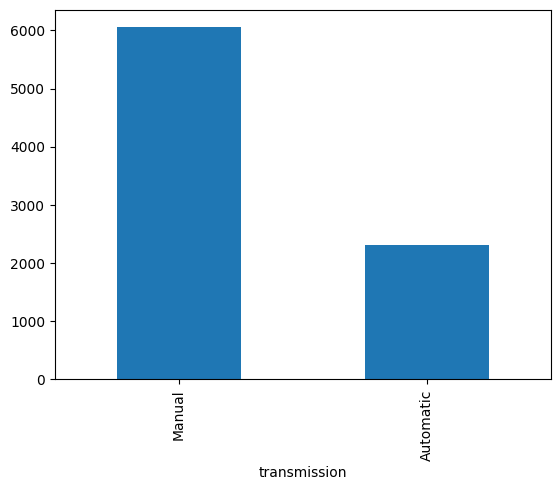

In [445]:
detail_frame.transmission.value_counts().plot(kind='bar')

In [446]:
OemPriceFrameTrans = detail_frame.groupby(['oem','transmission']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrameBT['mean'] = OemPriceFrameBT["mean"].apply(lambda x : x/100000)

OemPriceFrameTrans.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(OemPriceFrameTrans, x="oem", y="Avg Price",color = 'transmission', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Price Of Cars In Each Transmission Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Price Of Cars")

fig.show()

#No manual vehicles in lexus, Porsche, Land Rover, BMW, Jaguar, Volvo, Mini


### Owner Vs OEM Vs Price

<Axes: xlabel='owner'>

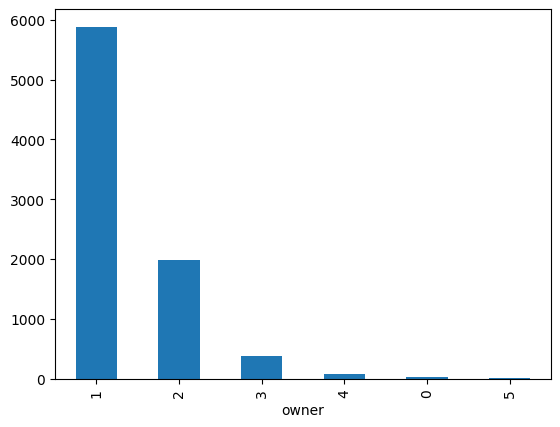

In [447]:
detail_frame.owner.value_counts().plot(kind='bar')

#maximum cars having owners of 1, 2, 3

In [448]:
OemCountFrameOwner = detail_frame.groupby(['oem','owner']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrameOwner.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrameOwner, x="oem", y="Total Cars",color = 'owner', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Each Owner Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")

fig.show()

#Single type owners are maximum

In [449]:
KMPriceFrame = detail_frame.groupby(['oem','owner']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#KMPriceFrame['mean'] = KMPriceFrame["mean"].apply(lambda x : x/100000)

KMPriceFrame.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(KMPriceFrame, x="oem", y="Avg Price",color = 'owner', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Avg Price Of Cars In Each Owner Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Avg Price Of Cars")

fig.show()

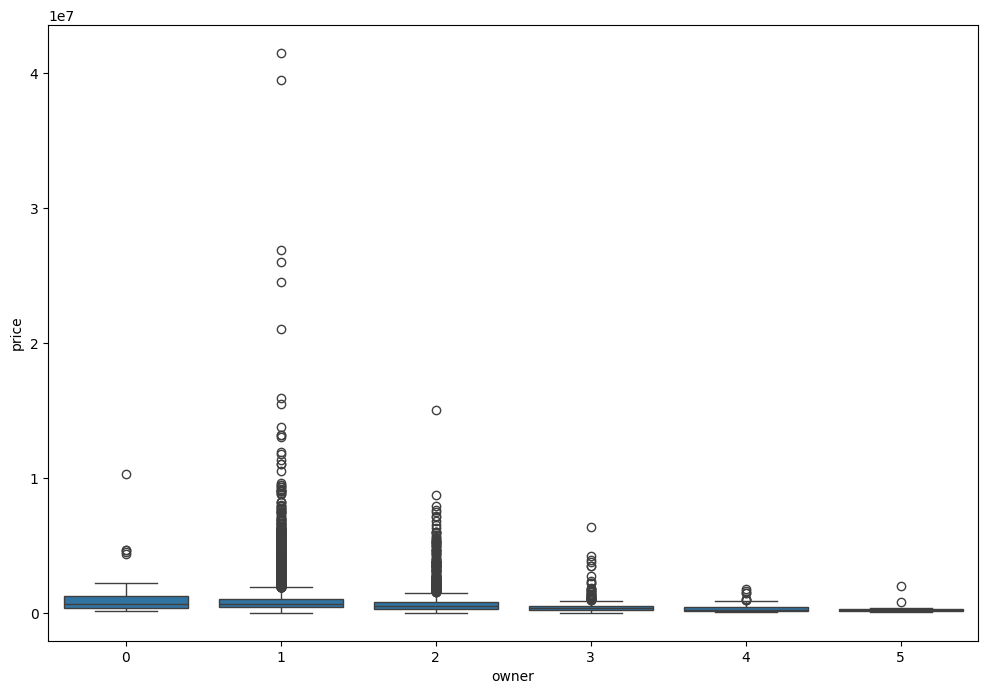

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'owner'
data = pd.concat([detail_frame['price'], detail_frame[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="price", data=data)


### Model Counts

#### Most Available Cars Vs Avg Price

In [451]:
ModelCountFrame = detail_frame.groupby(['model']).price.agg(['count','mean']).sort_values(by = 'count',ascending = False).reset_index()

MostModelFrame = ModelCountFrame[:20]

MostModelFrame.rename(columns = {'count':'Total Cars','mean':'Avg Price'}, inplace = True)

fig = px.bar(MostModelFrame, x="model", y="Total Cars", color= 'Avg Price', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="Model Wise Most No Of Cars Available")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Car Models")
fig.update_yaxes(title_text="Total No Of Cars Available")

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_23808\1327429505.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Least Available Cars Vs Avg Price

In [452]:
ModelCountFrame = detail_frame.groupby(['model']).price.agg(['count','mean']).sort_values(by = 'count',ascending = False).reset_index()

MostModelFrame = ModelCountFrame.tail(20)

MostModelFrame.rename(columns = {'count':'Total Cars','mean':'Avg Price'}, inplace = True)

fig = px.bar(MostModelFrame, x="model", y="Total Cars", color= 'Avg Price', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="Model Wise Least No Of Cars Available")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Car Models")
fig.update_yaxes(title_text="Total No Of Cars Available")

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_23808\509540554.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Model Year Vs OEM 

#### ModelYear Vs OEM Vs Total Counts

In [453]:
OemCountFrameYear = detail_frame.groupby(['oem','modelYear']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrameYear.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrameYear, x="oem", y="Total Cars",color = 'modelYear', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Years")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")

fig.show()

#### Total Cars Available Vs Years

In [454]:
CarCountByYear = detail_frame.modelYear.value_counts().to_frame().reset_index()
CarCountByYear.rename(columns = {'count':'Total Cars'}, inplace = True)

fig = px.bar(CarCountByYear, x="modelYear", y="Total Cars", orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="Year Wise Total No Of Cars Available")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Years Of Model")
fig.update_yaxes(title_text="Total No Of Cars Available")

In [455]:
detail_frame.head()

,ft,bt,km,transmission,owner,oem,model,modelYear,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,bangalore
1,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000.0,bangalore
2,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000.0,bangalore
3,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,462000.0,bangalore
4,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,790000.0,bangalore


In [456]:
detail_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ft            8369 non-null   object 
 1   bt            8369 non-null   object 
 2   km            8369 non-null   float64
 3   transmission  8369 non-null   object 
 4   owner         8369 non-null   int64  
 5   oem           8369 non-null   object 
 6   model         8369 non-null   object 
 7   modelYear     8369 non-null   int64  
 8   variantName   8369 non-null   object 
 9   price         8369 non-null   float64
 10  place         8369 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 719.3+ KB


# Car Overview Cleaning Process

In [457]:
#caroverview
print("1st row value----->",cardf['new_car_overview'].to_list()[0])
overview_frame = caroverview(cardf.loc[:,['new_car_overview']])
overview_frame['place'] = cardf.place.to_list()
overview_frame.head()

1st row value-----> {'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2015', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '1,20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'KA51', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Third Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '998 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key'

converted dictionary----> {'Registration Year': '2015', 'Insurance Validity': 'Third Party insurance', 'Fuel Type': 'Petrol', 'Seats': '5 Seats', 'Kms Driven': '1,20,000 Kms', 'RTO': 'KA51', 'Ownership': 'Third Owner', 'Engine Displacement': '998 cc', 'Transmission': 'Manual', 'Year of Manufacture': 2015}
all overview keys----> ['Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture']


,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,place
0,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,bangalore
1,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0,bangalore
2,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0,bangalore
3,Dec 2014,Comprehensive,Petrol,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,Manual,2014.0,bangalore
4,2015,Third Party insurance,Diesel,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,Manual,2015.0,bangalore


* All details available in Car Spec details. From the data we will take only insurance validaty
* https://www.team-bhp.com/forum/technical-stuff/234153-why-engine-displacement-never-exact-number.html 

In [458]:
overviewdf = overview_frame[['Insurance Validity']]
overviewdf.head(2)

,Insurance Validity
0,Third Party insurance
1,Comprehensive


# Feature Dataframe

In [459]:
feature_frame = carfeature(cardf.loc[:,['new_car_feature']])

feature_frame.head()

First row feature-------------> {'Features': ['Power Steering', 'Power Windows Front', 'Air Conditioner', 'Heater', 'Adjustable Head Lights', 'Manually Adjustable Exterior Rear View Mirror', 'Centeral Locking', 'Child Safety Locks'], 'Comfort & Convenience': ['Power Steering', 'Power Windows Front', 'Power Windows Rear', 'Remote Trunk Opener', 'Remote Fuel Lid Opener', 'Low Fuel Warning Light', 'Accessory Power Outlet', 'Vanity Mirror', 'Rear Seat Headrest', 'Cup Holders Front'], 'Interior': ['Air Conditioner', 'Heater', 'Digital Odometer', 'Electronic Multi Tripmeter', 'Fabric Upholstery', 'Glove Compartment', 'Digital Clock'], 'Exterior': ['Adjustable Head Lights', 'Manually Adjustable Exterior Rear View Mirror', 'Wheel Covers', 'Power Antenna', 'Chrome Grille'], 'Safety': ['Centeral Locking', 'Child Safety Locks', 'Day Night Rear View Mirror', 'Passenger Side Rear View Mirror', 'Halogen Headlamps', 'Rear Seat Belts', 'Door Ajar Warning', 'Side Impact Beams', 'Front Impact Beams', 'A

,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication
0,8,10,7,5,13,0
1,9,17,12,12,27,9
2,9,14,12,13,24,8
3,9,16,10,10,18,7
4,9,21,11,13,22,8


In [460]:
#Total No of features in each category 

print('Unique Values')

for i in feature_frame.columns.to_list():
    
    print(f"{i} - {sorted(feature_frame[i].unique())}")

Unique Values
Features - [0, 2, 3, 4, 5, 6, 7, 8, 9]
Comfort & Convenience - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37]
Interior - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Exterior - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Safety - [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 48]
Entertainment & Communication - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21]


# Spec Frame

In [461]:
spec_frame = carspec(cardf.loc[:,['new_car_specs']])

spec_frame.head(3)

1st car spec row-----> {'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '23.1 kmpl'}, {'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '67.04bhp'}, {'key': 'Torque', 'value': '90Nm'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': 'K10B Engine'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '67.04bhp@6000rpm'}, {'key': 'Max Torque', 'value': '90Nm@3500rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'MPFi'}, {'key': 'BoreX Stroke', 'value': '73 X 82 mm'}, {'key': 'Compression Ratio', 'value': '11.0:1'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 

,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,...,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
0,998 CC,67.04bhp@6000rpm,90Nm,None,5,White,K10B Engine,998,90Nm@3500rpm,3.0,...,11.0:1,No,1420mm,1410mm,1250kg,4.7 metres,150 Kmph,15.05 Seconds,73 X 82 mm,None
1,1497 CC,121.31bhp@6500rpm,150Nm,16,5,White,Ti-VCT Petrol Engine,1497,150Nm@4500rpm,3.0,...,11.0:1,No,None,None,1660Kg,5.3 metres,None,None,79 X 76.5 mm,None
2,1199 CC,84bhp@6000rpm,114Nm,14,5,Red,Revotron Engine,1199,114Nm@3500rpm,3.0,...,10.8:1,No,1400mm,1420mm,None,4.9 meters,150 kmph,14.3 Seconds,77 X 85.8 mm,None


In [462]:
spec_frame.to_csv('spec.csv')

### Spec Frame Cleaning

In [463]:
spec_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Engine                    8365 non-null   object 
 1   Max Power                 8309 non-null   object 
 2   Torque                    8309 non-null   object 
 3   Wheel Size                5386 non-null   object 
 4   Seats                     8364 non-null   object 
 5   Color                     8366 non-null   object 
 6   Engine Type               8074 non-null   object 
 7   Displacement              8365 non-null   object 
 8   Max Torque                8309 non-null   object 
 9   No of Cylinder            8338 non-null   float64
 10  Values per Cylinder       8318 non-null   float64
 11  Fuel Suppy System         6642 non-null   object 
 12  Turbo Charger             7329 non-null   object 
 13  Length                    8290 non-null   object 
 14  Width   

#### Engine Column

In [464]:
def enginecc(engine):
    if engine is not None:
        return int(engine.split()[0])
    else:
        return 0
    
spec_frame.Engine = spec_frame.Engine.apply(lambda engine : enginecc(engine))


#### Max Power Column

In [465]:
#identity the pattern in Max Power to extract values
spec_frame['Max Power'].value_counts()

Max Power
81.80bhp@6000rpm        291
81.86bhp@6000rpm        277
88.50bhp@6000rpm        267
83.1bhp@6000rpm         198
74bhp@4000rpm           171
                       ... 
65.39bhp@6000rpm          1
110.5bhp@6300rpm          1
187.74bhp@4200rpm         1
321bhp@5800rpm            1
142 @ 4,000 (PS@rpm)      1
Name: count, Length: 760, dtype: int64

In [466]:
spec_frame[spec_frame['Max Power'] == '142 @ 4,000 (PS@rpm)']

,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,...,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
1591,1991,"142 @ 4,000 (PS@rpm)",33,16,5,White,In-Line Engine,1991,"33 @ 2,000-2,680 (kgm@rpm)",4.0,...,17.3:1,No,"1,565 mm","1,550 mm",None,5.46 m,None,None,83 x 92 mm,None


In [479]:
def Horsepower(BHP):
    if BHP is not None:
        values =  re.findall(r"\d+\.\d+|\d{3}|\d{2}", BHP)
        return float(values[0])
    else:
        return ""

def rotation(RPM):
    if RPM is not None:
        values =  re.findall(r"\d{4}|\d{1},\d{3}", RPM)
        if values == []:
            return RPM
        else:
            
            text = re.findall(r"\d",values[0])
            
            return int("".join(text))
    else:
        return ""
        

BHPFrame = pd.DataFrame({})  
BHPFrame['BHP Power']=spec_frame['Max Power'].apply(lambda BHP : Horsepower(BHP))

BHPFrame['BHP Rotation'] = spec_frame['Max Power'].apply(lambda RPM : rotation(RPM))

BHPFrame.head()

,BHP Power,BHP Rotation
0,67.04,6000
1,121.31,6500
2,84.0,6000
3,81.86,6000
4,88.5,4000


#### Torque Column

In [481]:
#Black, White, Silver, Gray, Blue, Red, Green, Yellow, Orange, Purple

spec_frame.Color.unique()

array(['White', 'Red', 'Others', 'Gray', 'Grey', 'Maroon', 'Orange',
       'Silver', 'Blue', 'Brown', 'Yellow', 'Black', 'Golden', 'Green',
       'O Purple', None, 'Other', 'Gold', 'TITANIUM GREY', 'Violet',
       'MODERN STEEL METALLIC', 'PLATINUM WHITE', 'Golden Brown',
       'Aurora Black Pearl', 'Beige', 'Star Dust', 'Flash Red', 'Purple',
       'PLATINUM WHITE PEARL', 'Wine Red', 'Taffeta White',
       'Minimal Grey', 'Fiery Red', 'T Wine', 'Prime Star Gaze',
       'TAFETA WHITE', 'P Black', 'Golden brown', 'METALL',
       'MET ECRU BEIGE', 'COPPER', 'TITANIUM', 'CHILL', 'Burgundy',
       'Lunar Silver Metallic', 'SILKY SILVER', 'BERRY RED',
       'PREMIUM AMBER METALLIC', 'R EARTH', 'PLATINUM SILVER',
       'ORCHID WHITE PEARL', 'CARNELIAN RED PEARL', 'POLAR WHITE',
       'BEIGE', 'Medium Blue', 'Alabaster Silver Metallic',
       'Carbon Steel', 'Cavern Grey', 'ESPRESO_BRWN', 'Pearl White',
       'Polar White', 'Magma Grey', 'Dark Red', 'Falsa Colour', 'Cherry',
   

In [483]:
spec_frame['Max Torque'].value_counts()

Max Torque
90Nm@3500rpm            378
200Nm@1750rpm           283
113Nm@4200rpm           275
113Nm@4400rpm           238
110Nm@4800rpm           233
                       ... 
110Nm                     1
190nm@1750-2250rpm        1
436.4Nm@1800-2500rpm      1
345Nm@4500rpm             1
100Nm@2700rpm             1
Name: count, Length: 617, dtype: int64

In [470]:
re.findall(r"\d", '6,000rpm')

['6', '0', '0', '0']

In [471]:
text = "453.26bhp@5250-5500rpm"
matches = re.findall(r"\d{4}|\d{1},\d{3}", text)
print(matches)

['5250', '5500']
